# Project: Identifying Fraud from Enron Emails and Financial Data

## Introduction

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for to executives.

Using the EDA skill and machine learning skill, I'll build a classifier to identifying fraud from enron emails and financial data.

#### File of this project

* `final_project/modelpipeline.py` : script I wrote before the final script to include a whole process of data preprocessing, generating new features, spliting into training and testing set, feature scale, feature selection, evaluating 8 different classifiers.


* `final_project/poi_id.py` : The final script to use the selected features to build a classifier, do parameter tuning and return the required pickle files (my_dataset.pkl, my_classifier.pkl, my_feature_list.pkl).


* `final_project/my_classifier.pkl`


* `final_project/my_dataset.pkl`


* `final_project/my_feature_list.pkl`


* `final_project/final_project_dataset.pkl` : Final project dataset.


* `final_project/data.csv` : A csv formate dataset transformed from `final_project_dataset.pkl`


* `final_project/Project.html` : Documentation of the work I've done and answers to the questions.


* `final_project/tester.py` : Script for evaluation.


* `final_project/transformData.py` : Script for transforming data from pkl to csv.


* `final_project/modelselect.txt` : Model evaluation result and final features generated from `final_project/modelpipeline.py`.


* `tools/` : helper tools and functions

## Free-Response Questions

## Question 1

> Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

The aim of this project is to use financial and email data from Enron to identify whether an individual could be considered a "person of interest" (POI). This is a typical classification problem and several  machine learning algorithms as classifier can be used for this problem. 

In [1]:
import pandas as pd
import os
df = pd.read_csv('data.csv',index_col=[0])
print("data shape:",df.shape)
print("Allocation across classes (POI/non-POI):")
df['poi'].value_counts()

data shape: (146, 21)
Allocation across classes (POI/non-POI):


False    128
True      18
Name: poi, dtype: int64

In [2]:
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person,poi
name,,,,,,,,,,,,,,,,,,,,,
METTS MARK,365788.0,807.0,NaN,1061827.0,NaN,600000.0,585062.0,702.0,NaN,585062.0,...,NaN,29.0,1740.0,1.0,NaN,NaN,NaN,mark.metts@enron.com,38.0,False
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,...,NaN,NaN,2660303.0,NaN,NaN,-1386055.0,1586055.0,NaN,NaN,False
ELLIOTT STEVEN,170941.0,NaN,NaN,211725.0,4890344.0,350000.0,1788391.0,NaN,NaN,6678735.0,...,NaN,NaN,12961.0,NaN,NaN,-400729.0,NaN,steven.elliott@enron.com,NaN,False
CORDES WILLIAM R,NaN,764.0,NaN,NaN,651850.0,NaN,386335.0,58.0,NaN,1038185.0,...,NaN,12.0,NaN,0.0,NaN,NaN,NaN,bill.cordes@enron.com,10.0,False
HANNON KEVIN P,243293.0,1045.0,NaN,288682.0,5538001.0,1500000.0,853064.0,1035.0,NaN,6391065.0,...,NaN,32.0,11350.0,21.0,NaN,-3117011.0,1617011.0,kevin.hannon@enron.com,32.0,True


Take a glance at the data, it contains 146 records with 20 features and 1 label. And after reading the feature names, I identified 14 financial features and 6 email features. Although it has missing data, the data structure is quite clear and can be fed into classifiers to train and test furture data for whether or not their label of poi is 'True' or 'False'. The summary of the "poi" class also indicates that this is a biased data.

In [3]:
# count missing data in each column
df.isnull().sum()

salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
exercised_stock_options       44
bonus                         64
restricted_stock              36
shared_receipt_with_poi       60
restricted_stock_deferred    128
total_stock_value             20
expenses                      51
loan_advances                142
from_messages                 60
other                         53
from_this_person_to_poi       60
director_fees                129
deferred_income               97
long_term_incentive           80
email_address                 35
from_poi_to_this_person       60
poi                            0
dtype: int64

As the statistical overview shows, all the features contain missing data, especially loan_advances. It only has 4 validated data point. 

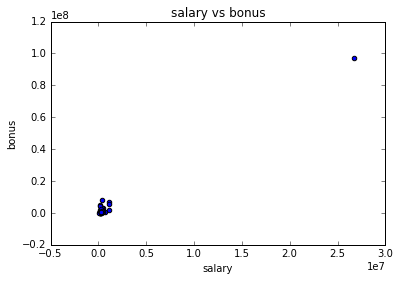

TOTAL


In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
subdf = df[['salary','bonus']]
subdf = subdf.dropna()
plt.scatter(subdf['salary'],subdf['bonus'])
plt.xlabel('salary')
plt.ylabel('bonus')
plt.title('salary vs bonus')
plt.show()
print(df['salary'].idxmax())

As the scatter shows, there's a outlier. This is a spreadsheet artifact and is removed and not considered for further study.

## Question 2

> What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “properly scale features”, “intelligently select feature”]

Since the "email_address" is not numeric feature, I dropped it. And additionally, I created four aggregate features:

* `poi_connect`: Sum of `from_poi_to_this_person` and `from_this_person_to_poi`. This indicates how offen this person contacts POIs by email.
* `ratio_from_poi`: Fraction of emails the pserson received from POIs.
* `ratio_to_poi`: Fraction of emails the pserson send to POIs.
* `ratio_poi_connect`: The ratio of `from_poi_to_this_person` and `from_this_person_to_poi`.

All of the above features can be found in the script *modelpipeline.py*. But after I combine these 4 features with other 19 features ('salary', 'to_messages', 'deferral_payments', 'total_payments','exercised_stock_options', 'bonus', 'restricted_stock','shared_receipt_with_poi', 'restricted_stock_deferred','total_stock_value', 'expenses','other', 'from_this_person_to_poi', 'director_fees','deferred_income', 'long_term_incentive','from_poi_to_this_person') and did a feautre selection using *SelectKBest(k=5)*, 4 new features were not in the returned list. So the features I end up using in my POI identifier is 'salary','exercised_stock_options','bonus','shared_receipt_with_poi' and 'total_stock_value', all of which are selected by sklearn function SelectKBest. 

The score of each feature is listed below. Given that there are only 146 person in the dataset, too many features may lead to overfitting. In this case, 5 top scored features were used in the final model. Because I first tried top 10 and 8 features for the final model, but their precision and recall were quite low, maybe the 10 or 8 features are still too many that can cause overfitting, so finally I only used 5 features.

**Feature** | **Score**
----------- | ---------
bonus | 30.65
salary | 15.81
total_stock_value | 10.81
shared_receipt_with_poi | 10.67
exercised_stock_options | 9.96

In the final feature list, 4 of them are financial features. The feature on the top is "bonus". It gains far more score than other features. It captured how much wealth a person has and it seems that wealth strongly implied whether or not a person is a POI. "shared_receipt_with_poi" is the only one email features that indicates person's connection with a POI.

Before training the classifiers, features were scaled using MinMaxScaler in sklearn. It even goes before feature selection. Because features should be transformed to a same scale before them are sorted using scoring function or fed into classifiers. since we don't have a favourite one, them should be weighted evenly.

For 8 classifiers that I used, k-Nearest Neighbors, Linear SVM and RBF SVM require feature scaling, others don't need it. But since my purpose is only to select a final classifier and for coding convince I used scaled features for all of them. For the final script *poi_id.py*, I didn't use feature scaling as I only use Decision Tree as my final classifier which don't need feature scaling.

## Question 3

> What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?

The classifier comparison process can be found in the script *modelpipeline.py*. The script output the comparison result to a file named *modelselect.txt*. I tested 8 classifiers: k-Nearest Neighbors, Linear SVM, RBF SVM, Decision Tree, Random Forest, AdaBoost, Naive Bayes and GradientBoostingClassifier. 

From the classification report, I found that several classifiers have pretty good result. Because their precision and recall for POI class is higher than 0.3. Since identifying POI is our main task, the performace for the non-POI is less important than that for the POI class. Two SVM performed quite bad. Their precision and recall for POI class is 0. That means they cannot correactlly identify any POI. Random Forest has a perfect overall performance. Decision tree, gradientBoostingClassifier and Naive Bayes are all pretty good.

Although Random Forest seems to be the best one, Naive Bayes is the second one. I tried them in the final *poi_id.py*, the result is not good.  So I made a choice between decision tree and gradientBoostingClassifier. Of course gradientBoostingClassifier is a great classifier. But I think decision tree is reasonably sufficient enought for this project and will consume much less time for parameter tuning than gradientBoostingClassifier.

**Classification Report:**

Nearest Neighbors:

             precision    recall  f1-score   support

        0.0       0.90      0.97      0.94        39
        1.0       0.50      0.20      0.29         5

    avg / total   0.86      0.89      0.86        44

Linear SVM:

             precision    recall  f1-score   support

        0.0       0.89      1.00      0.94        39
        1.0       0.00      0.00      0.00         5

    avg / total   0.79      0.89      0.83        44

RBF SVM:

             precision    recall  f1-score   support

        0.0       0.89      1.00      0.94        39
        1.0       0.00      0.00      0.00         5

    avg / total   0.79      0.89      0.83        44

Decision Tree:

             precision    recall  f1-score   support

        0.0       0.92      0.90      0.91        39
        1.0       0.33      0.40      0.36         5

    avg / total   0.85      0.84      0.85        44

Random Forest:

             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96        39
        1.0       1.00      0.40      0.57         5

    avg / total   0.94      0.93      0.92        44

AdaBoost:

             precision    recall  f1-score   support

        0.0       0.90      0.90      0.90        39
        1.0       0.20      0.20      0.20         5

    avg / total   0.82      0.82      0.82        44

Naive Bayes:

             precision    recall  f1-score   support

        0.0       0.95      0.95      0.95        39
        1.0       0.60      0.60      0.60         5

    avg / total   0.91      0.91      0.91        44

GradientBoostingClassifier:

             precision    recall  f1-score   support

        0.0       0.92      0.90      0.91        39
        1.0       0.33      0.40      0.36         5

    avg / total   0.85      0.84      0.85        44

GridSearchCV  DecisionTreeClassifier:

             precision    recall  f1-score   support

        0.0       0.92      0.92      0.92        39
        1.0       0.40      0.40      0.40         5

    avg / total   0.86      0.86      0.86        44

## Question 4

> What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? 

For decision tree classifier, parameter tuning is a crucial step to descrese the chance of overfitting. Large max_depth, small min_samples_split and small min_samples_leaf may all lead to overfitting. And whether using gini or  entropy as criterion will affact the quality of a split. I used GridSearchCV as parameter tuning tool and used f1 as scoring function because my goal is to have a classifier with high overall performace of precision and recall. Finally got max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='gini' for our classifier.

## Question 5 

> What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?

5-fold cross-validation is used for parameter tuning. It's fed into GridSearchCV as a parameter "cv".

A classic prediction mistake is overfitting. It means learning the parameters of a prediction function and testing it on the same data. A model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. When the data set is small, it will also generally turn out that the model does not fit the validation data as well as it fits the training data.

So, using the whole dataset for parameter tuning is not right. As our dataset is quite small, simply splitting it into two sets for parameter tuning is not appropriate. As a result, we need cross-validation for parameter tuning.

## Question 6

> Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance.

Several evaluation metrics were computed for the testset. Using classification_report, precision, recall and f1-score for each class is calculated. And also the Matthews correlation coefficient is listed below.

GridSearchCV  DecisionTreeClassifier:

             precision    recall  f1-score   support

        0.0       0.92      0.90      0.91        39
        1.0       0.33      0.40      0.36         5

    avg / total   0.85      0.84      0.85        44

MCC = 0.275070023392

The decision tree I optimized has a very decent precision and recall. Precision can be thought of as the ratio of how often the model is actually correct in identifying a positive label to the total times it guesses a positive label. A higher precision score would mean less false positives. Recall can be thought of as the ratio of how often the model correctly identifies a label as positive to how many total positive labels there actually are. A higher recall score would mean less false negatives. 

In this project, precision means the ratio of how often my model can correctly identify a person as POI to the total times that it predict a person as POI. On the other hand, recall means the ratio of how often my model can correctly identify a person as POI to all the POIs in the dataset. The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary (two-class) classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. 

## Conclusion

In this project, I went through the whole steps of machine learning from dataset and questions to finally building, validating and evaluating a model. Future work may involve adding more features and data and further feature engineering. 